# Using Data Analysis vs Crime Rates

<img src="esposas.jpg" width="80%">

<div class="alert alert-info"><h3>As part of the public politics that could be applied to help the fight against crime, we thought that there was some data analysis that could help focus the government efforts.<br>

In this regard, with our background experiences we came up with two different ideas that could help with this task:

- Detect which of the municipalities were the ones with the highest crime rates
- Determine if there are outside variables that could affect the crime rate

</h3>
</div>

# Introduction:

Part of our job was to narrow the search and determine which data sets we will use, finally, we agreed to use the data we were more familiar with:
1. <strong>The official government crime rate</strong>
2. <strong>Economic variables</strong>

So for the first task, <em> "Detect which of the municipalities were the ones with the highest crime rates"</em>, we decided to create heat maps that showed which were the municipalities with more crime. 

For the second task <em>"Determine if there are outside variables that could affect the crime rate"</em>, 
our objective was two solve the following question: <br>
<li><h6>Do economic variables affect the crime rate?</h6></li>

<img src="news.png" height="60%" width="50%">

## About the crime rates:

To work towards our two primary objectives, we determine that it was necessary the use of the <strong>official crime rates</strong> published monthly by the government. 

The information is published in this web page, with the following characteristics:
<br>
- <strong>Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública</strong> <a href='https://www.gob.mx/sesnsp/acciones-y-programas/incidencia-delictiva-87005?idiom=es'>www.gob.mx/sesnsp</a>
- The information is published monthly with one month offset
- The crime rates refers to the official reported crimes in the local government offices
- It is divided by different criteria according the type of crime 
- There is information reported from 2011 to 2019 in different data sets, one from 2011 to 2015 and other 
  from 2015 to 2019
- It has information of every municipality and state of the Mexican Republic

To narrow and ease our work we determine that we will use only the following information from this dataset:
- We will only use the crimes consider by the Mexican government of high impact which are the following:
<ol>
1. Wrongful murder, willful murder and femicide
2. Extorsion
3. Kidnap
4. Violent robbery 
5. Home, car and buisness robbery
</ol>
- We will use a monthly period of time, because the information comes with this sample rate
- We will use the information with the zoom to local or national depending on the economic variable
- We used the information given from 2011 to 2019

With this information about the crime rates we can start preparing our Data.

<img src="money.jpg" height="60%" width="50%">

In [14]:
### Libaries Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#quita el comentario
#path_crime = '/Users/roas/Projects_Git/TP1/Crimes2011-2019.csv' 
path_crime = 'Crimes2011-2019.csv'

In [16]:
df_crime = pd.read_csv(path_crime)
df_crime.rename(columns={"Unnamed: 0":"Date"}, inplace = True)
df_crime['Date'] = pd.to_datetime(df_crime['Date'])
df_crime.set_index('Date',inplace=True)

FileNotFoundError: [Errno 2] File b'Crimes2011-2019.csv' does not exist: b'Crimes2011-2019.csv'

In [17]:
df_delitos = df_crime.resample(rule='M').sum().dropna()

NameError: name 'df_crime' is not defined

In [35]:
df_delitos.columns

Index(['Año', 'Mes', 'id_estado', 'id_municipio', 'Extorsion', 'HomicidioCulp',
       'HomicidioDolo', 'Lesiones', 'RoboCasa', 'RoboNegocio', 'RoboSinViol',
       'RoboVehi', 'RoboViol', 'Secuestro', 'Trim', 'Poblacion', 'rtExtorsion',
       'rtHomicidioCulp', 'rtHomicidioDolo', 'rtLesiones', 'rtRoboCasa',
       'rtRoboNegocio', 'rtRoboSinViol', 'rtRoboVehi', 'rtRoboViol',
       'rtSecuestro'],
      dtype='object')

[Text(0, 0.5, '# of Occurrencies'), Text(0.5, 0, 'Dates')]

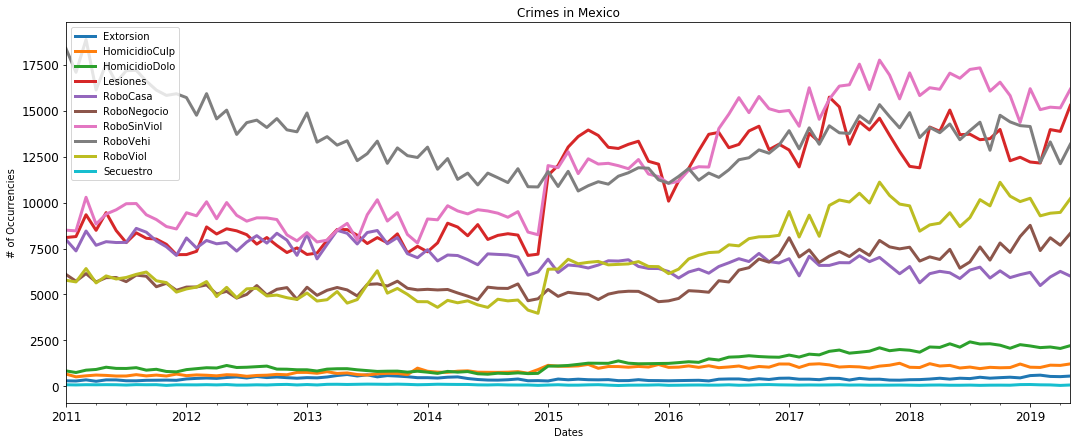

In [108]:
title = 'Crimes in Mexico'
xseries = 'Dates'
yseries = '# of Occurrencies'
ax = df_delitos[['Extorsion', 'HomicidioCulp',
       'HomicidioDolo', 'Lesiones', 'RoboCasa', 'RoboNegocio', 'RoboSinViol',
       'RoboVehi', 'RoboViol', 'Secuestro']].plot(figsize=(18,7), title=title, lw='3',fontsize=12)
ax.set(ylabel = yseries, xlabel = xseries)

[Text(0, 0.5, '# of Occurrencies'), Text(0.5, 0, 'Dates')]

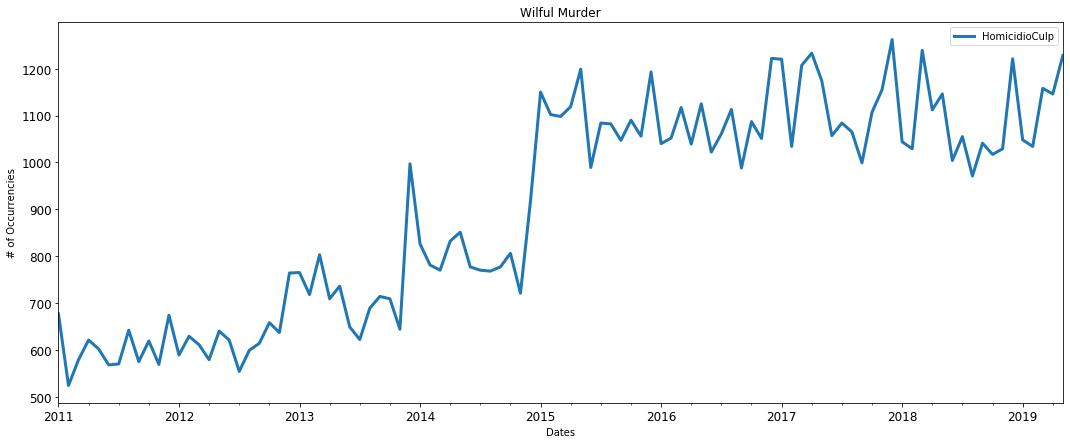

In [143]:
title = 'Wilful Murder'
xseries = 'Dates'
yseries = '# of Occurrencies'
ax = df_delitos[['HomicidioCulp']].plot(figsize=(18,7), title=title, lw='3',fontsize=12)
ax.set(ylabel = yseries, xlabel = xseries)

In [119]:
print('Analysis of crime in Mexico for May 2019')
# dftest = adfuller(df2['Births'],autolag='AIC')
# dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])
dftest= []
dftest.append( df_delitos['HomicidioDolo'].iloc[-1:].values +df_delitos['HomicidioCulp'].iloc[-1:].values)
dftest.append( df_delitos['Extorsion'].iloc[-1:].values)
dftest.append( df_delitos['Lesiones'].iloc[-1:].values)
dftest.append( df_delitos['RoboCasa'].iloc[-1:].values +
                df_delitos['RoboSinViol'].iloc[-1:].values + df_delitos['RoboSinViol'].iloc[-1:].values +
             df_delitos['RoboVehi'].iloc[-1:].values + df_delitos['RoboViol'].iloc[-1:].values) 
dftest.append(df_delitos['Secuestro'].iloc[-1:].values)

# dftest.append( df_delitos['Extorsion'].iloc[-1:].values)
# dftest.append( df_delitos['Extorsion'].iloc[-1:].values)
dfout = pd.DataFrame(dftest[0:5],index=['Total murders ','Total extorsions','Total violent injuries', 
                                        'Total robbery', 'Total kidnaps'])
dfout['January 2011']=[df_delitos['HomicidioDolo'].iloc[:1].values +df_delitos['HomicidioCulp'].iloc[:1].values,
                      df_delitos['Extorsion'].iloc[:1].values,
                      df_delitos['Lesiones'].iloc[:1].values,
                       df_delitos['RoboCasa'].iloc[:1].values +
                 df_delitos['RoboSinViol'].iloc[:1].values + df_delitos['RoboSinViol'].iloc[:1].values +
              df_delitos['RoboVehi'].iloc[:1].values + df_delitos['RoboViol'].iloc[:1].values,
                      df_delitos['Secuestro'].iloc[:1].values]

# df_jan11.append(df_delitos['Secuestro'].iloc[-1:].values)

dfout['Total']=[df_delitos['HomicidioDolo'].sum() +df_delitos['HomicidioCulp'].sum(),
                      df_delitos['Extorsion'].sum(),
                      df_delitos['Lesiones'].sum(),
                       df_delitos['RoboCasa'].sum() +
                 df_delitos['RoboSinViol'].sum() + df_delitos['RoboSinViol'].sum() +
              df_delitos['RoboVehi'].sum() + df_delitos['RoboViol'].sum(),
                      df_delitos['Secuestro'].sum()]



dfout.rename(columns={0:'May 2019'})

Analysis of crime in Mexico for May 2019


,May 2019,January 2011,Total
Total murders,3448.0,[1524.0],225473.0
Total extorsions,567.0,[308.0],42627.0
Total violent injuries,15281.0,[8097.0],1086111.0
Total robbery,61706.0,[49122.0],5173411.0
Total kidnaps,81.0,[93.0],8781.0


## About the economic variables:

Knowing the diversity and complexity of the economic and financial variables that there are, we focused to study only four of them. The economic variables we decided to use were the following:
1. Dolar to peso exchange rate, from 2011 to 2019, by month

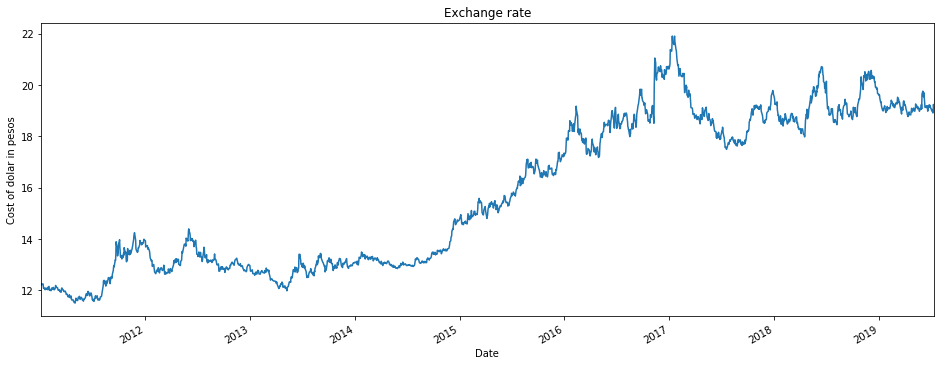

In [131]:
path_tpc = '/Users/roas/Projects_Git/TP1/Archivos/tpc_11_19.csv'
df = pd.read_csv(path_tpc)
df['Fecha'] = pd.to_datetime(df['Fecha'],format = "%d/%m/%y")
df.set_index('Fecha',inplace=True)


title1 = 'Exchange rate'
ylabel1 = 'Cost of dolar in pesos'
xlabel1 = 'Date'
ax1 = df['Dolar'].plot(figsize = (16,6), title = title1,)
ax1.set(xlabel = xlabel1, ylabel = ylabel1)
ax1.autoscale(axis='x',tight = True)

2. IPC (main Mexican stock market performance index), from 2011 to 2019, by month

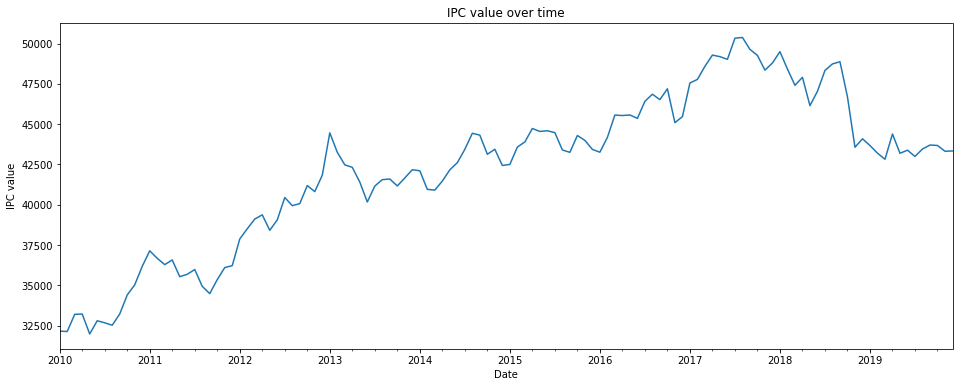

In [12]:
#IPC source csv file
path_IPC = "Data\Datos históricos S&P_BMV IPC (1).csv"

#Loading csv into a dataframe
datos_IPC = pd.read_csv(path_IPC)

#Set column date as index
datos_IPC["Fecha"] = pd.to_datetime(datos_IPC["Fecha"])
datos_IPC.set_index(datos_IPC["Fecha"], inplace=True)

#Resample by month
IPC_Monthly = datos_IPC.resample('M').mean()


#Plot IPC 
title1 = 'IPC value over time'
ylabel1 = 'IPC value'
xlabel1 = 'Date'
ax1 = IPC_Monthly['Cierre'].plot(figsize = (16,6), title = title1,)
ax1.set(xlabel = xlabel1, ylabel = ylabel1)
ax1.autoscale(axis='x',tight = True)

## Detect the municipalities with the highest crime rates

To detect the municipalities with highes crime rates, we created heat maps that helped detect the areas with more problem.



## Time series analysis

<strong><em>Here is where the things got complicated!</em></strong>

Both of our varibles (economic and crime rate) are described as a time serie and time series are not statistically described as we have seen in this course. Fortunatelly there are libraries in <tt>Python</tt> that help analyze data as a time serie. 

- According to wikipedia, a time series is <em>"a series of data points indexed in time order."</em>
- This differs from other analyses that compare $x$ to $y$, since $x$ is not really a variable. For example, if I measure the boiling point of water with 1%, 3%, 5% and 7% salt solutions, I should be able to predict the boiling point at 4%. But with time series, we can't go back and "plug in" a new value of $x$, since we can never go back in time. For this reason, a time series with one $y$ variable is called <em>univariate</em>. 

## Characteristics of a time serie

To ease the analysis of a time serie, mathematicians have separated three fundamental characteristics:
1. <strong>Trend:</strong> The behavoir of the information
2. <strong>Seasonality:</strong> Cyclical patterns 
3. <strong>Noise:</strong> Random, non-systemic fluctuations in the data

## Analysis:

There are many types of analysis that explain the behavoir of the information in a data serie, the tools that we used to achive the analysis are all function of the library <strong><tt>"Stats Models for Time Series Analysis"</tt></strong><a>(statsmodels.org)</a>:
- For analysing the trend in a time serie we used the The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> that separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$. 
- We us a seasonal decomposition tool  to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.
- To explain the patern of the information it is common to use the Simple Moving Average (SMA) and Exponentially Weighted Moving Average (EWMA).
- To explain seasonality and how the serie is affected by seasons, we used the 
- The Granger Causality test, its going to determine if one serie is good to forecast another. one thing is to try to determine correlation of a serie and another completly different thing to determine if they have causality. One time serie changes, causes another in the future to change as well, one time serie has causality in another. The Granger causality test tries to determine if.
Even if this test shows that there is causality there should be consider third party factors that could make both of the series do to change. 

In [132]:
dfmonthly = df.resample('M').mean()

In [133]:
from statsmodels.tsa.filters.hp_filter import hpfilter

[Text(0, 0.5, 'Cost of dolar in pesos'), Text(0.5, 0, 'Date')]

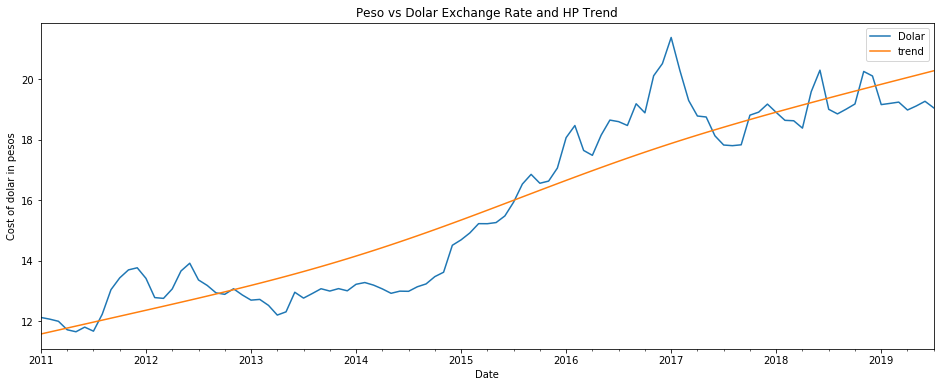

In [158]:
cycle, trend = hpfilter(dfmonthly['Dolar'],lamb = 129600)
dfmonthly['trend'] = trend
dfmonthly['cycle'] = cycle
ax2 = dfmonthly[['Dolar','trend']].plot(figsize = (16,6), title='Peso vs Dolar Exchange Rate and HP Trend')
ax2.set(ylabel='Cost of dolar in pesos', xlabel='Date')

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose

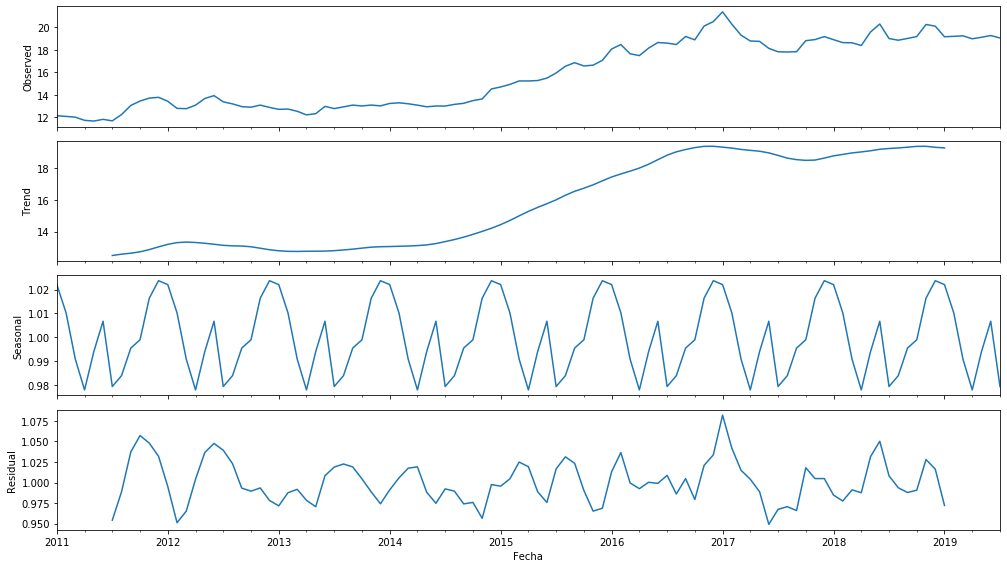

In [153]:
result = seasonal_decompose(dfmonthly['Dolar'],model='multiplicative')
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
result.plot();

In [141]:
dfmonthly['3-month-SMA'] = dfmonthly['Dolar'].rolling(window = 3).mean()

In [155]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
dfmonthly['DES_add_12'] = ExponentialSmoothing(dfmonthly['Dolar'],trend='add').fit().fittedvalues.shift(-1)
dfmonthly.columns

Index(['Dolar', 'trend', '3-month-SMA', 'cycle', 'DES_add_12'], dtype='object')

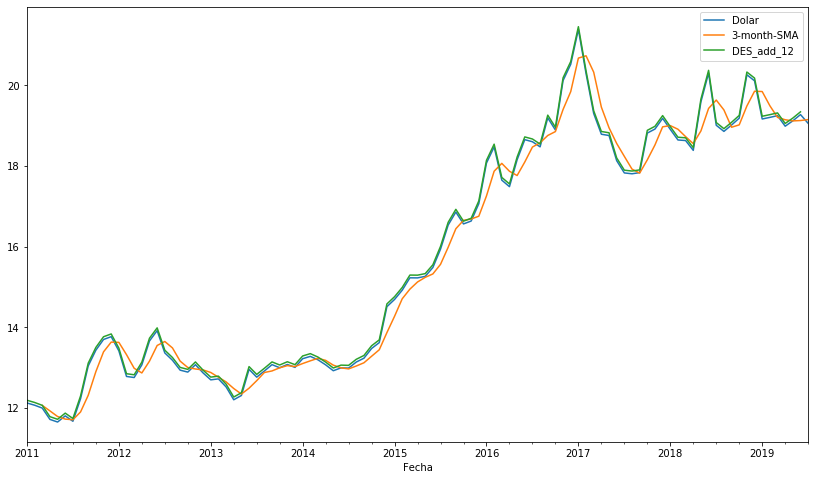

In [157]:
dfmonthly[['Dolar', '3-month-SMA', 'DES_add_12']].plot(figsize = (14,8))

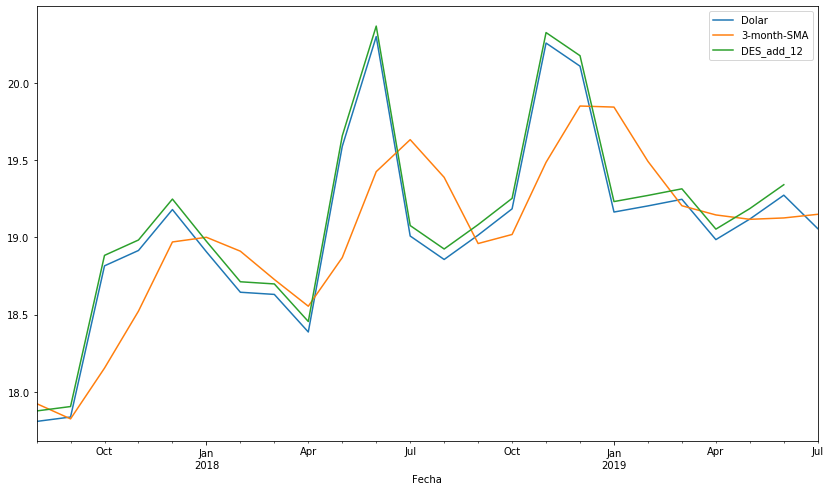

In [156]:
dfmonthly[['Dolar', '3-month-SMA', 'DES_add_12']].iloc[-24:].plot(figsize = (14,8))

Granger Causality Tests

Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In [ ]:
#residual from dolar
dol_res = resu

## Introduction: * 2 min
About the data. (Raul)
 - Hypothesis null and alternative (Raul)
 - Where the data comes from (Raul)
 - Describe the data (Raul)
     - What crimes we use and why
     - Periods of time
     - Places
 - What economic variables we use and why
 - Where do they come from
 - What does each economic variable means
 


## Process: * 4 min
- Data cleaning (Carlos)
- Graphics vs time (Luis Sauceda)
    - How is the trend of the data economic variables and crime rates being affected 
- Explain Maps and how we got there (Carlos)

## Conclusion: * 4 min
- Using a static model to describe the data trend (Luis Felipe)
- How to explain the effect of two variables over a period of time (Luis Sauceda)
